### Convert time to distance travelled by profiler

Develop a function to convert measurements of time from conduino  to distance travelled through the water column
by the probe. 

* It takes 10 s for the probe to complete a cycle

In [1]:
import os
import glob
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from numpy.polynomial import polynomial as P
import pandas as pd
#import seaborn as sns
import scipy.io as sio
from scipy.interpolate import interp1d
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

import sys
sys.path.append('/ocean/kramosmu/MultipleCanyons/lab/Conduino/scripts')
import conduino_tools as ctools

In [2]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [3]:
sns.set_style('whitegrid')
sns.set_context('notebook')

-0.1487530156


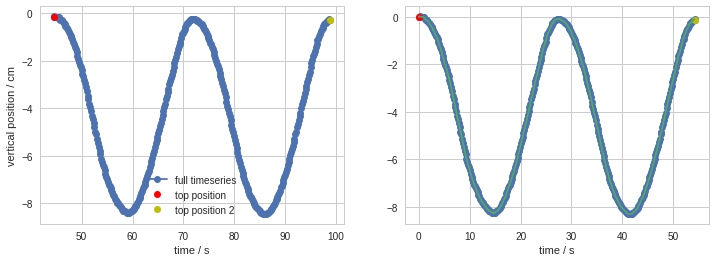

In [4]:
# Find interp function velocity of the profiler
df = pd.read_csv('/ocean/kramosmu/MultipleCanyons/lab/Conduino/scripts/profiler_tracking_08aug19.txt',
                 delim_whitespace=True, header=1)

time_p = np.array(df['t'][:])
ydist = np.array(df['y'][:])
top_pos = ydist[0]
top_pos2 = ydist[325]
ini_time = time_p[0]
end_time = time_p[325]

time = time_p[0:325]-ini_time
position = ydist[0:325]-top_pos

fig, (ax0, ax1) = plt.subplots(1,2,figsize=(12,4))
ax0.plot(time_p, ydist,'-o', label='full timeseries')
ax0.plot(ini_time, top_pos,'or', label='top position')
ax0.plot(end_time, top_pos2,'oy', label='top position 2')

ax1.plot(time_p-time_p[0], ydist-ydist[0],'-o', label='cropped timeseries')
ax1.plot(ini_time-ini_time, top_pos-top_pos,'or', label='top position')
ax1.plot(end_time-ini_time, top_pos2-top_pos,'oy', label='top position 2')
ax1.plot(time, position)
ax0.set_xlabel('time / s')
ax1.set_xlabel('time / s')
ax0.set_ylabel('vertical position / cm')
ax0.legend()
print(top_pos2-top_pos)

Text(0,0.5,'position / cm')

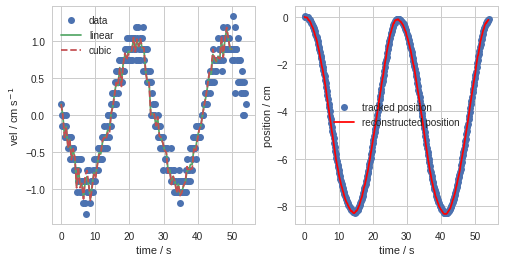

In [5]:
# Find interp function velocity of the profiler

time_small = time[0:-1]
vel = (position[1:]-position[:-1])/(time[1:]-time[:-1])

f = interp1d(time_small, vel)
f2 = interp1d(time_small, vel, kind='cubic')

xnew = np.linspace(0, 50, num=100, endpoint=True)
dist = np.zeros(np.shape(time_small))

for ii in range(1,len(vel)):
    dist[ii] = (vel[ii]*(time_small[ii]-time_small[ii-1]))+dist[ii-1] 

fig, ax = plt.subplots(1,2,figsize=(8,4))
ax[0].plot(time_small, vel, 'o', xnew, f(xnew), '-', xnew, f2(xnew), '--')
ax[1].plot(time, position,'o', label='tracked position')
ax[1].plot(time_small, dist, 'r', label='reconstructed position')

ax[0].legend(['data', 'linear', 'cubic'], loc='best')
ax[1].legend( loc='best')
ax[0].set_xlabel('time / s')
ax[1].set_xlabel('time / s')
ax[0].set_ylabel('vel / cm s$^{-1}$')
ax[1].set_ylabel('position / cm')

### Test

No handles with labels found to put in legend.


Text(0.5,0,'time / s')

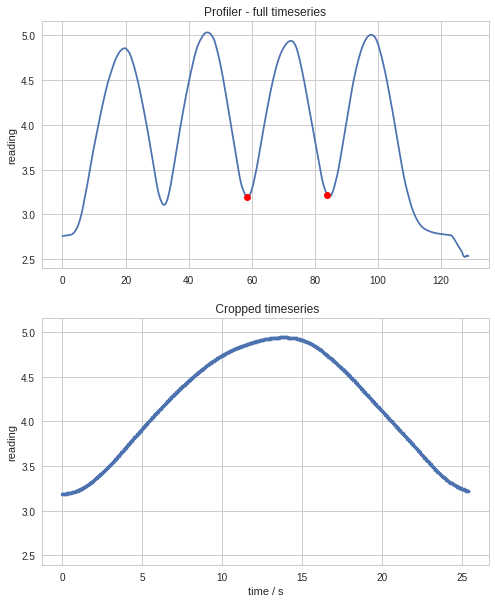

In [23]:
fig, (ax0,ax1) = plt.subplots(2,1, figsize=(8,10), sharey=True)

filepaths = ['../../Conduino/experiments/exp_31jul19/04_profile.mat'   
            ]
ini_indices = [1365]#[525]
end_indices = [1958]#[752]

for filepath, ind, end in zip(filepaths, ini_indices, end_indices):
    mat = sio.loadmat(filepath, squeeze_me=True)
    P3_unfilt = mat['ch3']#dens_C(mat['ch2'])
    time = mat['time']
    P3 = ctools.filter_timeseries(P3_unfilt,winlen=100)
    ax0.plot(time[:],P3[:])
    ax0.plot(time[ind], P3[ind],'or')
    ax0.plot(time[end], P3[end],'or')
    ax1.plot(time[ind:end]-time[ind],P3[ind:end],'.-')
   
ax1.legend(bbox_to_anchor=(1,1))

ax0.set_ylabel('reading')
ax1.set_ylabel('reading')

ax0.set_title('Profiler - full timeseries')
ax1.set_title(' Cropped timeseries')
ax1.set_xlabel('time / s')

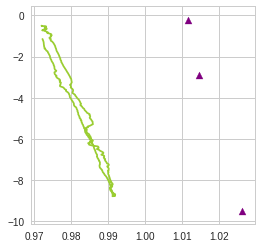

In [24]:
fig, ax = plt.subplots(1,1,figsize=(4,4))

filepath = '../../Conduino/experiments/exp_01aug19/05_profile1.mat'    
ini = 1365
end = 1958

mat = sio.loadmat(filepath, squeeze_me=True)
P3 = mat['ch3'] #dens_C(mat['ch2'])
time_cond = mat['time']
   
time_int = time_cond[ind:end]-time_cond[ind]
vel_int = f(time_int)
dist_int = np.zeros(np.shape(time_int))

for ii in range(1,len(time_int)):
    dist_int[ii] = (vel_int[ii]*(time_int[ii]-time_int[ii-1]))+dist_int[ii-1] 


ax.plot(ctools.densP_06Jul19(P3[ind:end])-0.05,dist_int-0.5, label='profiler', color='yellowgreen')
ax.scatter(1.01470,-2.9, marker='^', color='purple')
ax.scatter(1.02617,-9.5, marker='^', color='purple')
ax.scatter(1.01167,-0.2, marker='^', color='purple')


In [25]:
import sys
sys.path.append('/ocean/kramosmu/MultipleCanyons/lab/Conduino/scripts')
import profiler_tools as ptools

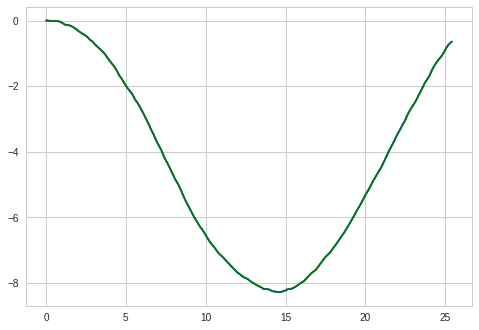

In [26]:
distance2 = ptools.profiler_08aug(time_int)
plt.plot(time_int,distance2, 'b-',time_int,distance2, 'g-')

### Aug 01

-0.01915481689362447 1.3876481590510208


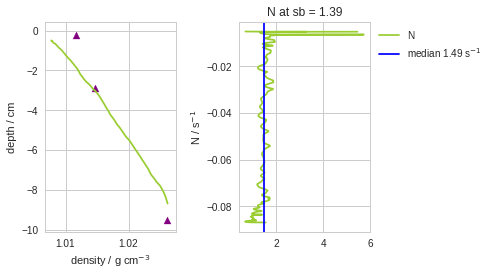

In [28]:
fig, (ax, ax1) = plt.subplots(1,2,figsize=(7,4))

filepath = '../../Conduino/experiments/exp_01aug19/05_profile1.mat'   

ini = 1354
end = 1690
rho_0 = 998.38
g = 9.81

mat = sio.loadmat(filepath, squeeze_me=True)
P3_unfilt = mat['ch3'] #dens_C(mat['ch2'])
P3 = ctools.filter_timeseries(P3_unfilt,winlen=100)
time_cond = mat['time']
   
time_int = time_cond[ind:end]-time_cond[ind]
dist_int = ptools.profiler_08aug(time_int)
density = 1000*(ctools.densP_06Jul19(P3[ind:end])-0.015)
distance = 0.01*(dist_int[:]-0.5)

ax.plot(density/1000,dist_int-0.5, label='profiler', color='yellowgreen')

No = ((g/rho_0)*(-(density[2:]-density[:-2])/(distance[2:]-distance[:-2])))**0.5
ax1.plot(No,
         distance[1:-1], 
         label='N', color='yellowgreen')
ax1.axvline(np.nanmedian(No), color='b', label='median %1.2f s$^{-1}$'%np.nanmedian(No))
ax1.legend(bbox_to_anchor=(1,1))
ax.set_ylabel('depth / cm')
ax1.set_ylabel('depth / m')
ax.set_xlabel('density / g cm$^{-3}$')
ax1.set_ylabel('N / s$^{-1}$')

ax.scatter(1.01470,-2.9, marker='^', color='purple')
ax.scatter(1.02617,-9.5, marker='^', color='purple')
ax.scatter(1.01167,-0.2, marker='^', color='purple')
print(distance[100],No[100])
ax1.set_title('N at sb = %1.2f' %No[100] )
plt.tight_layout()

### Jul 31

-0.01794669897861449 1.724709322636436


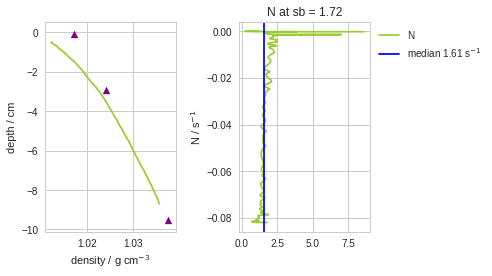

In [30]:
fig, (ax,ax1) = plt.subplots(1,2,figsize=(7,4))

filepath = '../../Conduino/experiments/exp_31jul19/04_profile.mat'   

ini = 1364
end = 1686
rho_0 = 998.38
g = 9.81
mat = sio.loadmat(filepath, squeeze_me=True)
P3_unfilt = mat['ch3'] #dens_C(mat['ch2'])
P3 = ctools.filter_timeseries(P3_unfilt,winlen=100)
time_cond = mat['time']
   
time_int = time_cond[ind:end]-time_cond[ind]
dist_int = ptools.profiler_08aug(time_int)

density = 1000*(ctools.densP_06Jul19(P3[ind:end])-0.005)
distance = 0.01*(dist_int[:])

ax.plot(density/1000,dist_int-0.5, label='profiler', color='yellowgreen')

No = ((g/rho_0)*(-(density[2:]-density[:-2])/(distance[2:]-distance[:-2])))**0.5
ax1.plot(No,
         distance[1:-1], 
         label='N', color='yellowgreen')
ax1.axvline(np.nanmedian(No), color='b', label='median %1.2f s$^{-1}$'%np.nanmedian(No))
ax1.legend(bbox_to_anchor=(1,1))
ax.scatter(1.02405,-2.9, marker='^', color='purple')
ax.scatter(1.03744,-9.5, marker='^', color='purple')
ax.scatter(1.01706,-0.1, marker='^', color='purple')
ax.set_ylabel('depth / cm')
ax1.set_ylabel('depth / m')
ax.set_xlabel('density / g cm$^{-3}$')
ax1.set_ylabel('N / s$^{-1}$')
print(distance[111],No[111])
ax1.set_title('N at sb = %1.2f' %No[111] )
plt.tight_layout()

### Aug 05

No handles with labels found to put in legend.


Text(0.5,0,'time / s')

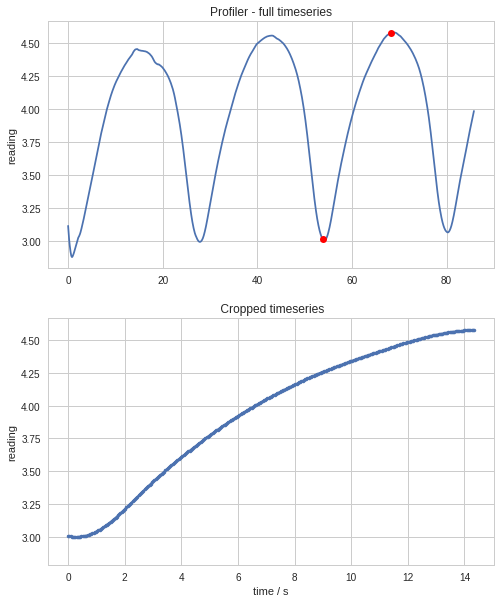

In [36]:
fig, (ax0,ax1) = plt.subplots(2,1, figsize=(8,10), sharey=True)

filepaths = ['../../Conduino/experiments/exp_05aug19/06_profiler.mat'   
            ]
ini_indices = [1255]
end_indices = [1590]

for filepath, ind, end in zip(filepaths, ini_indices, end_indices):
    mat = sio.loadmat(filepath, squeeze_me=True)
    P3_unfilt = mat['ch3']#dens_C(mat['ch2'])
    time = mat['time']
    P3 = ctools.filter_timeseries(P3_unfilt,winlen=100)
    ax0.plot(time[:],P3[:])
    ax0.plot(time[ind], P3[ind],'or')
    ax0.plot(time[end], P3[end],'or')
    ax1.plot(time[ind:end]-time[ind],P3[ind:end],'.-')
   
ax1.legend(bbox_to_anchor=(1,1))

ax0.set_ylabel('reading')
ax1.set_ylabel('reading')

ax0.set_title('Profiler - full timeseries')
ax1.set_title(' Cropped timeseries')
ax1.set_xlabel('time / s')

-0.017959373602920888 1.5288654131565522


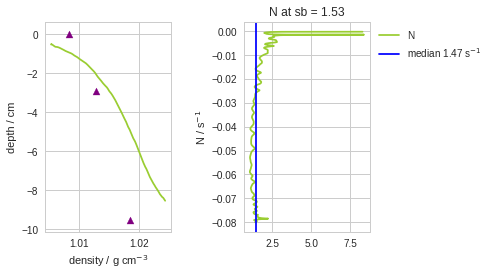

In [38]:
fig, (ax,ax1) = plt.subplots(1,2,figsize=(7,4))

filepath = '../../Conduino/experiments/exp_05aug19/06_profiler.mat'   

ini = 1255
end = 1560
rho_0 = 998.38
g = 9.81
mat = sio.loadmat(filepath, squeeze_me=True)
P3_unfilt = mat['ch3'] #dens_C(mat['ch2'])
P3 = ctools.filter_timeseries(P3_unfilt,winlen=100)
time_cond = mat['time']
   
time_int = time_cond[ind:end]-time_cond[ind]
dist_int = ptools.profiler_08aug(time_int)

density = 1000*(ctools.densP_06Jul19(P3[ind:end])-0.01)
distance = 0.01*(dist_int[:])

ax.plot(density/1000,dist_int-0.5, label='profiler', color='yellowgreen')

No = ((g/rho_0)*(-(density[2:]-density[:-2])/(distance[2:]-distance[:-2])))**0.5
ax1.plot(No,
         distance[1:-1], 
         label='N', color='yellowgreen')
ax1.axvline(np.nanmedian(No), color='b', label='median %1.2f s$^{-1}$'%np.nanmedian(No))
ax1.legend(bbox_to_anchor=(1,1))
ax.scatter(1.01273,-2.9, marker='^', color='purple')
ax.scatter(1.01842,-9.5, marker='^', color='purple')
ax.scatter(1.00828,-0.0, marker='^', color='purple')
ax.set_ylabel('depth / cm')
ax1.set_ylabel('depth / m')
ax.set_xlabel('density / g cm$^{-3}$')
ax1.set_ylabel('N / s$^{-1}$')
print(distance[111],No[111])
ax1.set_title('N at sb = %1.2f' %No[111] )
plt.tight_layout()

### Aug 07

No handles with labels found to put in legend.


Text(0.5,0,'time / s')

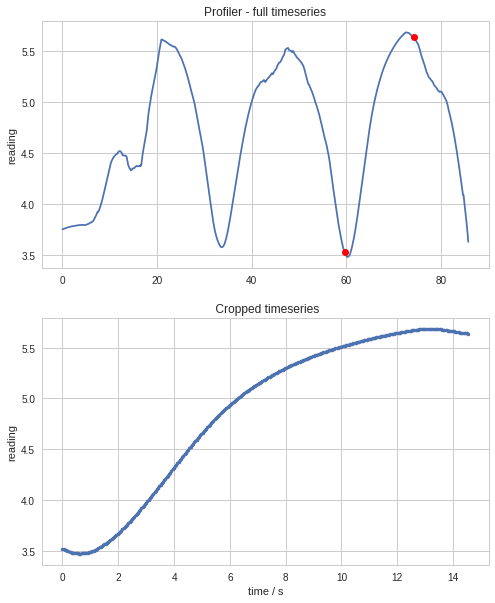

In [20]:
fig, (ax0,ax1) = plt.subplots(2,1, figsize=(8,10), sharey=True)

filepaths = ['../../Conduino/experiments/exp_07aug19/05_profile.mat'   
            ]
ini_indices = [1390]
end_indices = [1730]

for filepath, ind, end in zip(filepaths, ini_indices, end_indices):
    mat = sio.loadmat(filepath, squeeze_me=True)
    P3_unfilt = mat['ch3']#dens_C(mat['ch2'])
    time = mat['time']
    P3 = ctools.filter_timeseries(P3_unfilt,winlen=100)
    ax0.plot(time[:],P3[:])
    ax0.plot(time[ind], P3[ind],'or')
    ax0.plot(time[end], P3[end],'or')
    ax1.plot(time[ind:end]-time[ind],P3[ind:end],'.-')
   
ax1.legend(bbox_to_anchor=(1,1))

ax0.set_ylabel('reading')
ax1.set_ylabel('reading')

ax0.set_title('Profiler - full timeseries')
ax1.set_title(' Cropped timeseries')
ax1.set_xlabel('time / s')

-0.01795306458888264 2.5253057356510036


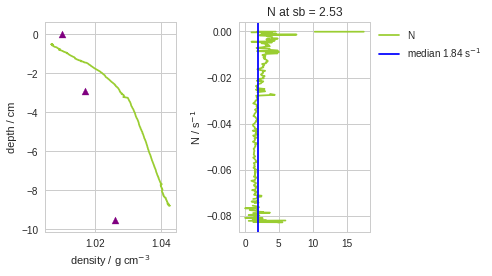

In [21]:
fig, (ax,ax1) = plt.subplots(1,2,figsize=(7,4))

filepath = '../../Conduino/experiments/exp_07aug19/05_profile.mat'   

ini = 1390
end = 1730
rho_0 = 998.68
g = 9.81
mat = sio.loadmat(filepath, squeeze_me=True)
P3 = mat['ch3'] #dens_C(mat['ch2'])
time_cond = mat['time']
   
time_int = time_cond[ind:end]-time_cond[ind]
dist_int = ptools.profiler_08aug(time_int)

density = 1000*(ctools.densP_06Jul19(P3[ind:end])-0.012)
distance = 0.01*(dist_int[:])

ax.plot(density/1000,dist_int-0.5, label='profiler', color='yellowgreen')

No = ((g/rho_0)*(-(density[2:]-density[:-2])/(distance[2:]-distance[:-2])))**0.5
ax1.plot(No,
         distance[1:-1], 
         label='N', color='yellowgreen')
ax1.axvline(np.nanmedian(No), color='b', label='median %1.2f s$^{-1}$'%np.nanmedian(No))
ax1.legend(bbox_to_anchor=(1,1))
ax.scatter(1.01680,-2.9, marker='^', color='purple')
ax.scatter(1.02611,-9.5, marker='^', color='purple')
ax.scatter(1.00967,0.0, marker='^', color='purple')
ax.set_ylabel('depth / cm')
ax1.set_ylabel('depth / m')
ax.set_xlabel('density / g cm$^{-3}$')
ax1.set_ylabel('N / s$^{-1}$')
print(distance[111],No[111])
ax1.set_title('N at sb = %1.2f' %No[111] )
plt.tight_layout()

### Aug 08

No handles with labels found to put in legend.


Text(0.5,0,'time / s')

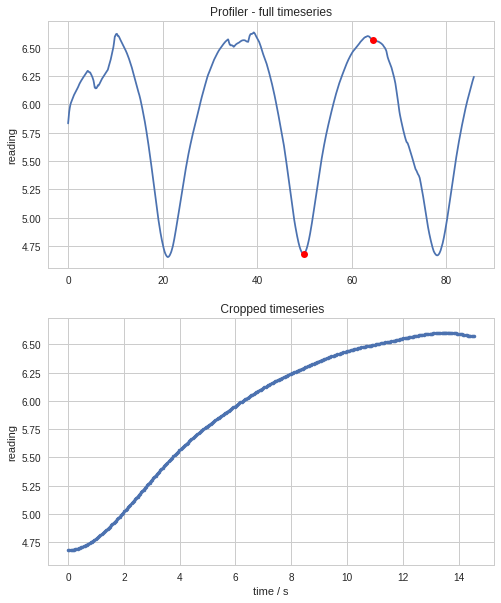

In [18]:
fig, (ax0,ax1) = plt.subplots(2,1, figsize=(8,10), sharey=True)

filepaths = ['../../Conduino/experiments/exp_08aug19/02_profile1.mat'   
            ]
ini_indices = [1160]
end_indices = [1500]

for filepath, ind, end in zip(filepaths, ini_indices, end_indices):
    mat = sio.loadmat(filepath, squeeze_me=True)
    P3_unfilt = mat['ch3']#dens_C(mat['ch2'])
    time = mat['time']
    P3 = ctools.filter_timeseries(P3_unfilt,winlen=100)
    ax0.plot(time[:],P3[:])
    ax0.plot(time[ind], P3[ind],'or')
    ax0.plot(time[end], P3[end],'or')
    ax1.plot(time[ind:end]-time[ind],P3[ind:end],'.-')
   
ax1.legend(bbox_to_anchor=(1,1))

ax0.set_ylabel('reading')
ax1.set_ylabel('reading')

ax0.set_title('Profiler - full timeseries')
ax1.set_title(' Cropped timeseries')
ax1.set_xlabel('time / s')

-0.01796403730798952 2.4940567113617296


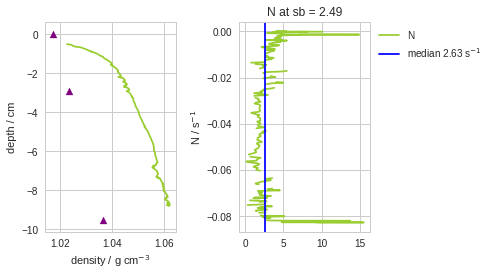

In [19]:
fig, (ax,ax1) = plt.subplots(1,2,figsize=(7,4))

filepath = '../../Conduino/experiments/exp_08aug19/02_profile1.mat'   

ini = 1150
end = 1500
rho_0 = 998.68
g = 9.81
mat = sio.loadmat(filepath, squeeze_me=True)
P3 = mat['ch3'] #dens_C(mat['ch2'])
time_cond = mat['time']
   
time_int = time_cond[ind:end]-time_cond[ind]
dist_int = ptools.profiler_08aug(time_int)

density = 1000*(ctools.densP_06Jul19(P3[ind:end])-0.011)
distance = 0.01*(dist_int[:])

ax.plot(density/1000,dist_int-0.5, label='profiler', color='yellowgreen')

No = ((g/rho_0)*(-(density[2:]-density[:-2])/(distance[2:]-distance[:-2])))**0.5
ax1.plot(No,
         distance[1:-1], 
         label='N', color='yellowgreen')
ax1.axvline(np.nanmedian(No), color='b', label='median %1.2f s$^{-1}$'%np.nanmedian(No))
ax1.legend(bbox_to_anchor=(1,1))
ax.scatter(1.02351,-2.9, marker='^', color='purple')
ax.scatter(1.03658,-9.5, marker='^', color='purple')
ax.scatter(1.01740,0.0, marker='^', color='purple')
ax.set_ylabel('depth / cm')
ax1.set_ylabel('depth / m')
ax.set_xlabel('density / g cm$^{-3}$')
ax1.set_ylabel('N / s$^{-1}$')
print(distance[111],No[111])
ax1.set_title('N at sb = %1.2f' %No[111] )
plt.tight_layout()